<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/GaussianNaiveBayesFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

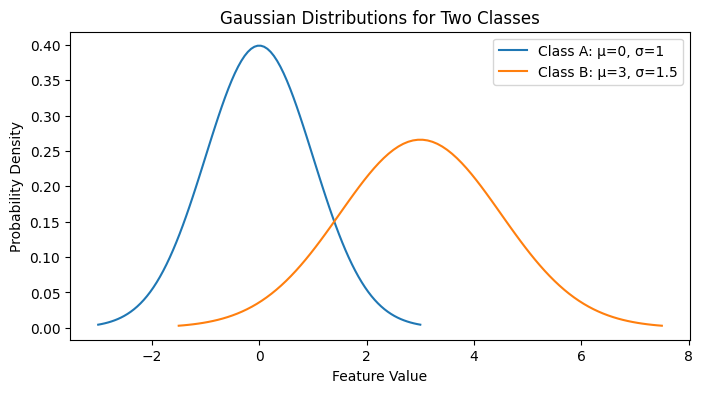

In [ ]:
import numpy as np
# import ipdb

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            # Filter rows for this class
            X_c = X[y == c]
            # Calculate mean and variance for each feature
            # ipdb.set_trace(context = 10)
            self.parameters.append({
                "mean": X_c.mean(axis=0),
                "var": X_c.var(axis=0),
                "prior": X_c.shape[0] / X.shape[0]
            })

    def _pdf(self, class_idx, x):
        # Gaussian PDF formula
        mean = self.parameters[class_idx]["mean"]
        var = self.parameters[class_idx]["var"]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = [self._get_best_class(x) for x in X]
        return np.array(y_pred)

    def _get_best_class(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            # Sum of logs for stability
            prior = np.log(self.parameters[i]["prior"])
            likelihood = np.sum(np.log(self._pdf(i, x)))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic 2D data
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
model = GaussianNaiveBayes()
model.fit(X, y)

# import matplotlib.pyplot as plt

def plot_gaussian(mean, std, label):
    # Create x-range (3 standard deviations)
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    # Calculate PDF
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)
    plt.plot(x, y, label=label)

plt.figure(figsize=(8, 4))
plot_gaussian(0, 1, "Class A: μ=0, σ=1")
plot_gaussian(3, 1.5, "Class B: μ=3, σ=1.5")
plt.title("Gaussian Distributions for Two Classes")
plt.xlabel("Feature Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()
